In [1]:
# pip install scikit-learn
# !pip install lightgbm
# !pip install seaborn

In [2]:
# Dependencies
import numpy as np  # for warking with matrix, numbers,...
import pandas as pd  # For manipulating data, creating dataframes,...
import seaborn as sea  # Visualization
import matplotlib.pyplot as plt  # Visualization
from sklearn.model_selection import train_test_split  # Splitting the data
from sklearn.metrics import accuracy_score  # Compute the accuracy score
from sklearn.metrics import confusion_matrix  # Find the Confusion Matrix
from sklearn.metrics import classification_report  # Classification Report
import lightgbm as gbm  # The LightGBM Model

In [3]:
# Reading Data
df = pd.read_csv(r'Breast_cancer_data.csv')

In [4]:
# Show the first 5 rows of the data
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [5]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [6]:
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [7]:
# Checking the missing values
if df.isnull().sum().sum() == 0:
  print("There are no missing values...")
else:
  print(f"There are missing values {df.isnull().sum().sum()}")

There are no missing values...


In [8]:
# Checking duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [9]:
df.duplicated().sum().sum()

0

<Axes: >

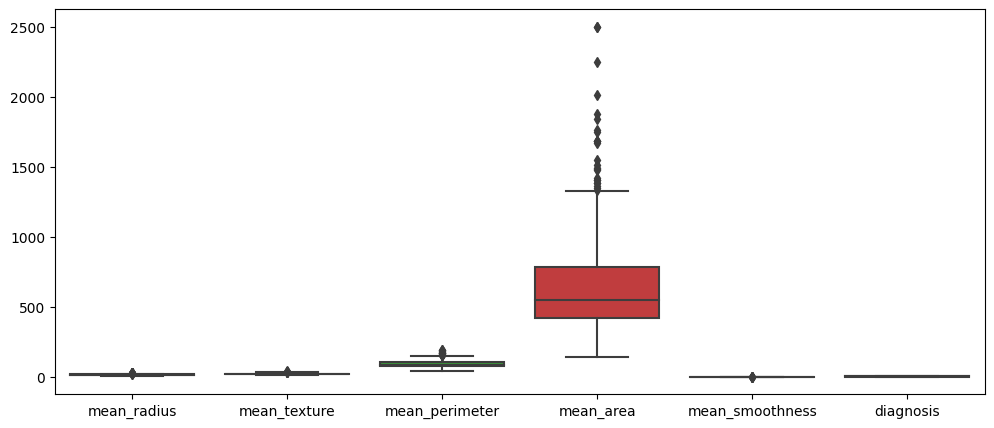

In [10]:
# Exploritory
plt.figure(figsize=(12, 5))
sea.boxplot(df)

In [11]:
# Handeling the outliers
def outlier_handler(data=df.copy()):

  for col in data.columns:
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75)
    IQR = Q3 - Q1
    a = Q1 - 1.5 * IQR
    b = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < a, a, data[col])
    data[col] = np.where(data[col] > b, b, data[col])

  return data

In [12]:
outlier_handler()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.118400,0.0
1,20.57,17.77,132.90,1326.0,0.084740,0.0
2,19.69,21.25,130.00,1203.0,0.109600,0.0
3,11.42,20.38,77.58,386.1,0.133695,0.0
4,20.29,14.34,135.10,1297.0,0.100300,0.0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1326.3,0.111000,0.0
565,20.13,28.25,131.20,1261.0,0.097800,0.0
566,16.60,28.08,108.30,858.1,0.084550,0.0
567,20.60,29.33,140.10,1265.0,0.117800,0.0


In [13]:
ndf = outlier_handler()

<Axes: >

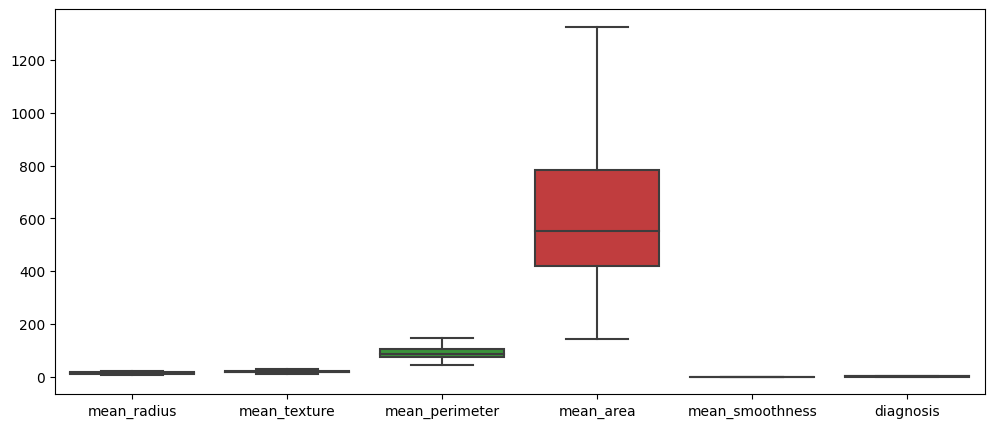

In [14]:
plt.figure(figsize=(12, 5))
sea.boxplot(ndf)

In [15]:
# Splitting the data
X = ndf[['mean_radius', 'mean_perimeter', 'mean_smoothness', 'mean_area']]  # Features
y = ndf['diagnosis']  # Target

In [16]:
feature_train, feature_test, label_train, label_test = train_test_split(X, y, train_size=0.8, random_state=2)

## Modeling

In [17]:
lgbm = gbm.LGBMClassifier()
lgbm.fit(feature_train, label_train)

[LightGBM] [Info] Number of positive: 288, number of negative: 167
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 608
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.632967 -> initscore=0.544967
[LightGBM] [Info] Start training from score 0.544967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

LGBMClassifier()

In [18]:
# Predicting
y_pred = lgbm.predict(feature_test)

In [19]:
# Accuracy of the model
accuracy_score(label_test, y_pred)

0.8771929824561403

In [20]:
# Accuracy score for the training data so we can know if there is overfitting or not
y_train_predict = lgbm.predict(feature_train)

In [21]:
accuracy_score(label_train, y_train_predict)

1.0

**The training and test set accuracy are quite comparable. So, we cannot say there is overfitting.**

In [22]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(label_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[39  6]
 [ 8 61]]

True Positives(TP) =  39

True Negatives(TN) =  61

False Positives(FP) =  6

False Negatives(FN) =  8


In [23]:
from sklearn import metrics

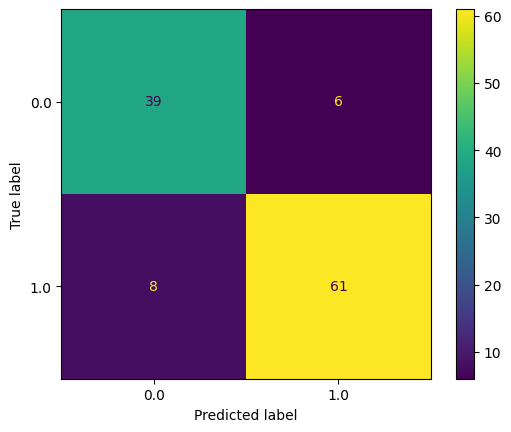

In [24]:
metrics.ConfusionMatrixDisplay.from_predictions(label_test, y_pred)

<Axes: >

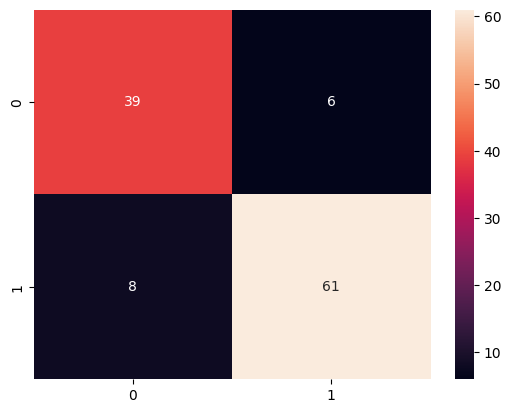

In [25]:
# Another way
sea.heatmap(cm, annot=True)

In [26]:
# Classification Report
print(classification_report(label_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85        45
         1.0       0.91      0.88      0.90        69

    accuracy                           0.88       114
   macro avg       0.87      0.88      0.87       114
weighted avg       0.88      0.88      0.88       114

